In [1]:
from __future__ import print_function
from __future__ import absolute_import
from __future__ import division

import scipy.spatial
import numpy as np

import pandas as pd
import networkx as nx

import matplotlib.pyplot as plt

import sklearn
from sklearn import metrics

from time import time
import sys

import copy

In [4]:
# Import Data
xvals = np.load('../arrays/full_embed/7D_coord_7x16k.npy')
one_d = np.load('../arrays/full_embed/labels_100.npy')

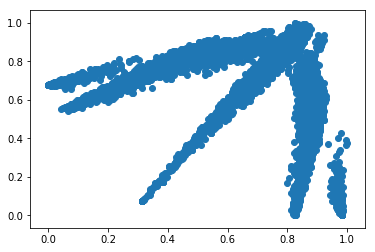

In [5]:
# Plot 2D embedding
plt.scatter(xvals[:,0],xvals[:,1])
plt.show()

In [6]:
# Calculate distances between all points
distances = scipy.spatial.distance.cdist(xvals,xvals)
one_d_dist = distances[np.triu_indices_from(distances,k=1)]

# Number of zero distances
print("Number of zero distances: ",len(one_d[np.nonzero(one_d_dist==0)]))

# Calculate metrics (threshold independent)
inv_one_d_dist = 1/one_d_dist
inv_one_d_dist[inv_one_d_dist == np.inf] = 0
print("ROC AUC: ",sklearn.metrics.roc_auc_score(one_d,inv_one_d_dist))
print("PRC AUC: ",sklearn.metrics.average_precision_score(one_d,inv_one_d_dist))

Number of zero distances:  19906


/home/ld2113/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


ROC AUC:  0.670203567105
PRC AUC:  0.00478949929997


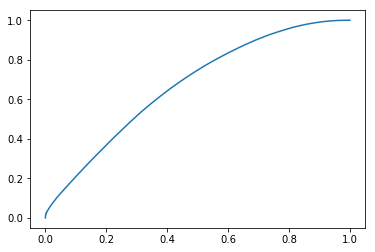

In [12]:
# Print ROCurve
roc=sklearn.metrics.roc_curve(one_d,inv_one_d_dist)
plt.plot(roc[0],roc[1])
plt.show()

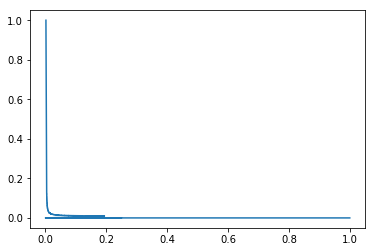

In [13]:
# Print PRCurve
prc=sklearn.metrics.precision_recall_curve(one_d,inv_one_d_dist)
plt.plot(prc[0],prc[1])
plt.show()

In [11]:
# Replace distances with binary labels according to a threshold
one_d_dist_bin = (copy.copy(one_d_dist) < 0.1).astype(int)


# Calculate proportion of 1 in embedded labels
print("Number of predicted interactions at this threshold: ", np.sum(one_d_dist_bin))
      
# Calculate metrics (threshold dependent)
print("Precision: ",sklearn.metrics.precision_score(one_d,one_d_dist_bin))
print("Accuracy: ",sklearn.metrics.accuracy_score(one_d,one_d_dist_bin))
print("Matthews Corr Coeff: ",sklearn.metrics.matthews_corrcoef(one_d,one_d_dist_bin))

Number of predicted interactions at this threshold:  282728
Precision:  0.0163514048838
Accuracy:  0.996202475429
Matthews Corr Coeff:  0.016683059821


In [17]:
# Replace distances with binary labels according to a threshold
one_d_dist_bin = (copy.copy(one_d_dist) < 0.08).astype(int)


# Calculate proportion of 1 in embedded labels
print("Number of predicted interactions at this threshold: ", np.sum(one_d_dist_bin))
      
# Calculate metrics (threshold dependent)
#print("Precision: ",sklearn.metrics.precision_score(one_d,one_d_dist_bin))
#print("Accuracy: ",sklearn.metrics.accuracy_score(one_d,one_d_dist_bin))
print("Matthews Corr Coeff: ",sklearn.metrics.matthews_corrcoef(one_d,one_d_dist_bin))

Number of predicted interactions at this threshold:  135683
Matthews Corr Coeff:  0.0191591416325


In [16]:
np.sum(one_d)

219216.0